## Detection of Parkinson’s Disease

Parkinson’s disease is a progressive neurodegenerative disorder of the central nervous system. The cause is 
unknown and there is no cure.
The Centers for Disease Control and Prevention (CDC) has rated the complications
associated with the disease as the 14th cause of death in the United States.

A pipeline of models is prepared for the detection and presence of the disease, and the results of three different
classification algorithms will be compared. The data is proivided by the University of California, Irvine. https://archive.ics.uci.edu/ml/datasets/parkinsons


- Step 1: Load the data
- Step 2: Explore the data
- Step 3: Prepare the data
- Step 4: Build and train models
- Step 5: Evaluate the models
- Step 6: Predict patients with the decease
- Step 7: Deploy the model (Optional)

### Import libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

### Step 1: Load and access the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JJSSEE/xData/master/DataX/parkinsons.data')
patient_names=df[['name']]

### Step 2: Explore the data



In [3]:
df.shape

(195, 24)

In [4]:
df_isna=pd.DataFrame(df.isna().sum())
print('total number of NAs in dataframe:', df_isna.sum()[0])

total number of NAs in dataframe: 0


In [5]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### Check the summary statistics

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Check the target variable `status` 

In [7]:
round(df["status"].value_counts(normalize = True),2)

1    0.75
0    0.25
Name: status, dtype: float64

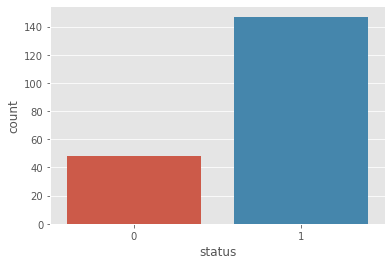

In [8]:
sns.countplot(df['status']) 
plt.show()
df['status'].value_counts();

In the above chart, you can see that the target is a binary variable with a non-uniform distribution. 

### Check the correlation between numerical features to understand relationships in the data

Text(0.5, 1.0, 'CORRELATION HEATMAP')

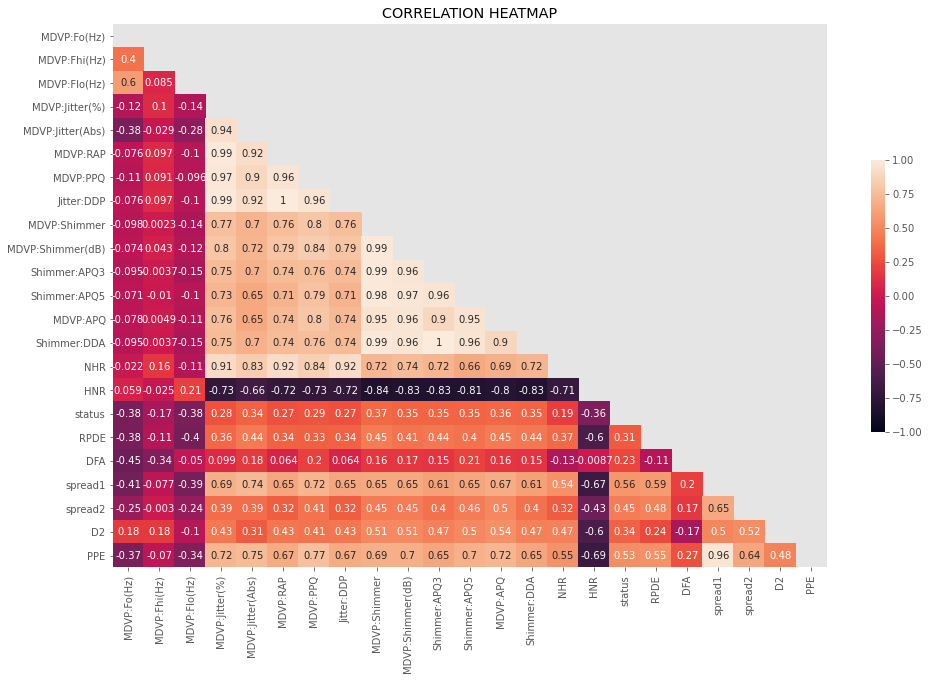

In [9]:
plt.figure(figsize=(16, 10))
corr = df.drop(['name'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cbar_kws={"shrink": .5})
heatmap.set_title('CORRELATION HEATMAP')

### Step 3: Prepare the data

Data pre-processing techniques, include: The addition, deletion, or transformation of the training data and the transformation of string data into numeric data. 

In [10]:
df = df.drop(['name'], axis=1)
X = df.drop(['status'], axis=1)
y = df['status']

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.20)

In [11]:
ordinal_cols_mapping = [{
    "col":"COMMENTS",  
    "mapping": [('Positive', 1), ('Negative', -1), ('Neutral', 0)]
}]

numerical_columns = X.select_dtypes(include=np.number).columns.tolist()

column_transformer = make_column_transformer(

    (MinMaxScaler(), numerical_columns), 
    remainder='passthrough')

### Step 4: Build and train models

- Random Forest
- Logistic Regression
- XGBoost

### Random Forest

In [12]:
rf_pipeline = make_pipeline(column_transformer, RandomForestClassifier(n_estimators=100))
rf_pipeline.fit(X_train, y_train)

y_rf_score = rf_pipeline.score(X_test, y_test)
print("Random Forest model accuracy:", np.round(y_rf_score, decimals=2))

Random Forest model accuracy: 0.95


In [13]:
y_rf_score

0.9487179487179487

### Logistic Regression

In [14]:
lr_pipeline = make_pipeline(column_transformer, LogisticRegression())
lr_pipeline.fit(X_train, y_train)

y_lr_score = lr_pipeline.score(X_test, y_test)
print("Logistic Regression model accuracy:", np.round(y_lr_score, decimals=2))

Logistic Regression model accuracy: 0.9


### XGBoost

In [15]:
xgb_pipeline = make_pipeline(column_transformer, XGBClassifier(eval_metric='logloss'))
xgb_pipeline.fit(X_train, y_train)

y_xgb_score = xgb_pipeline.score(X_test, y_test)
print("XGBoost model accuracy:", np.round(y_xgb_score, decimals=2))

XGBoost model accuracy: 1.0


### Step 5: Evaluate the model
Receiver Operating Characteristic Curve (ROC) and Area Under Curve (AUC). 

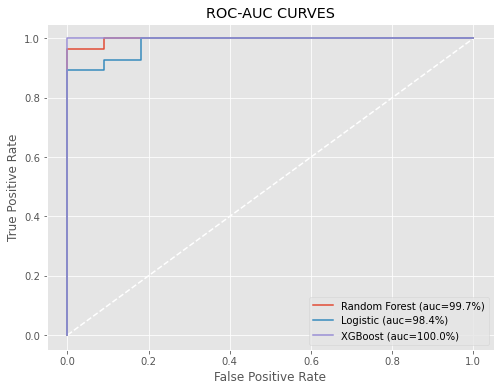

In [16]:
y_rf_probs = rf_pipeline.predict_proba(X_test)[::,1]
y_lr_probs = lr_pipeline.predict_proba(X_test)[::,1]
y_xgb_probs = xgb_pipeline.predict_proba(X_test)[::,1]

rf_auc = roc_auc_score(y_test, y_rf_probs)
lr_auc = roc_auc_score(y_test, y_lr_probs)
xgb_auc = roc_auc_score(y_test, y_xgb_probs)


rf_fpr, rf_tpr, _ = roc_curve(y_test, y_rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_lr_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_xgb_probs)

plt.figure(figsize=(8, 6))

plt.plot([0,1],[0,1],'w--')
plt.plot(rf_fpr, rf_tpr, label='Random Forest (auc={:.1%})'.format(rf_auc))
plt.plot(lr_fpr, lr_tpr, label='Logistic (auc={:.1%})'.format(lr_auc))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (auc={:.1%})'.format(xgb_auc))

plt.title('ROC-AUC CURVES')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Step 6: Predict which patients have Parkinson's decease

All three models appear to be overfitted. The Random Forest will be used as a demonstration of matric performance.

In [17]:
y_proba = rf_pipeline.predict_proba(X_test)
X_test["Prediction"] = labelencoder_y.inverse_transform(y_proba.argmax(axis=-1))
X_test["Probability"] = y_proba.max(axis=-1)

print("Predicting the decease on patients")
prediction=X_test[["Prediction", "Probability"]]
predictionX=X_test[["Prediction"]]

diagnostic_propensities=patient_names.join(prediction).dropna()
diagnostic_propensities.head()

Predicting the decease on patients


,name,Prediction,Probability
1,phon_R01_S01_2,1.0,1.00
2,phon_R01_S01_3,1.0,1.00
5,phon_R01_S01_6,1.0,0.99
10,phon_R01_S02_5,1.0,0.95
19,phon_R01_S05_2,1.0,1.00


The `Prediction` column contains the prediction results generated from the Random Forest model based on the patients history.
The `Probability` column contains the probability of each prediction.

In [18]:
f1_score=f1_score(y_test, predictionX)
recall_score=recall_score(y_test, predictionX)
print("f1 score : %0.3f" % f1_score)
print("recall score : %0.3f" % recall_score)

f1 score : 0.964
recall score : 0.964


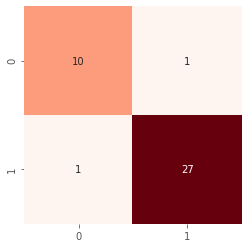

In [19]:
matrix_confusion = confusion_matrix(y_test, predictionX)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Reds', fmt='d', cbar=False);

### Step 7: Deploy the model (optional)

Deployment is the final stage of the lifecycle of a model or script. In a notebook, you can use the IBM Watson Machine Learning Python client library to deploy the trained machine learning model to IBM Watson Machine Learning.

Check out our online documentation, <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-overview.html" target="_blank" rel="noopener noreferrer">Deploying assets</a>, for more samples, tutorials, and information.


### Author

**Jose H Chiriboga** is an IBM Data Science student. This notebook is used for the dectection of Parkinson's desease 
using the data set from the University of California, Irvine.

Dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

***
Copyright © IBM Corp. 2021. This notebook and its source code are released under the terms of the MIT License.